In [186]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [187]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [188]:
df.shape

(346, 10)

In [189]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

In [190]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [191]:
import seaborn as sns

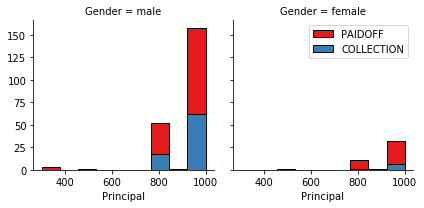

In [192]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

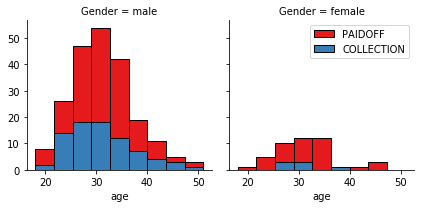

In [193]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec='k')

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

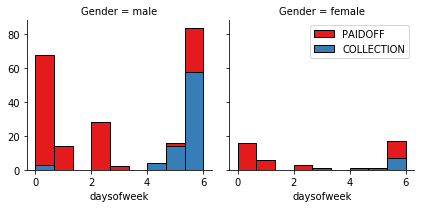

In [194]:
df['daysofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.daysofweek.min(), df.daysofweek.max(), 10)
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette="Set1" ,col_wrap=2)
g.map(plt.hist, 'daysofweek', bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

In [195]:
df['weekend'] = df['daysofweek'].apply(lambda x: 1 if x>3 else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,daysofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [196]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [197]:
df['Gender'].replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,daysofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [198]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [199]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [200]:
Feature_set = df[['Principal','terms','age','Gender','weekend']]
Feature_set = pd.concat([Feature_set, pd.get_dummies(df['education'])], axis=1)
Feature_set.drop(['Master or Above'], axis = 1,inplace=True)
Feature_set.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [201]:
X = Feature_set
X[:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [202]:
y = df['loan_status'].values
y[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [203]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

# 1. K Nearest Neighbor(KNN)

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape)

(276, 8) (70, 8)


In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, jaccard_similarity_score, f1_score

In [206]:
k = 10
acc_score = []
for i in range(1,k):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    acc_score.append(accuracy_score(y_test, yhat))

In [207]:
k_value = acc_score.index(max(acc_score)) + 1

In [208]:
neigh = KNeighborsClassifier(n_neighbors=k_value)
neigh.fit(X_train, y_train)
yhat = neigh.predict(X_test)
print(accuracy_score(y_test ,yhat))

0.785714285714


In [209]:
jaccard_KNN = jaccard_similarity_score(y_test, yhat)
f1_KNN = f1_score(y_test, yhat, average='weighted')
print(jaccard_KNN, f1_KNN)

0.785714285714 0.776654024442


# 2. Decision Tree

In [210]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
depth = 10
acc_score = {}
for i in range(3, depth):
    DeciTree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    DeciTree.fit(X_train, y_train)
    yhat = DeciTree.predict(X_test)
    acc_score.update({i : accuracy_score(y_test, yhat)})

In [212]:
max_acc = max(acc_score.values())
for i, j in acc_score.items():
    if j == max_acc:
        final_depth = i
final_depth

6

In [213]:
DeciTree = DecisionTreeClassifier(criterion='entropy', max_depth=final_depth)
DeciTree.fit(X_train, y_train)
yhat = DeciTree.predict(X_test)

In [214]:
jaccard_DeciTree = jaccard_similarity_score(y_test, yhat)
f1_DeciTree = f1_score(y_test, yhat, average='weighted')
print(jaccard_DeciTree, f1_DeciTree)

0.771428571429 0.706479313037


# 3. Support Vector Machine

In [215]:
from sklearn import svm

In [216]:
# Kernel for this model is 'RBF'

model1 = svm.SVC(kernel='rbf')
model1.fit(X_train, y_train)

yhat = model1.predict(X_test)
print(accuracy_score(y_test, yhat))

0.742857142857


In [217]:
# Kernel for this model is 'LINEAR'

model2 = svm.SVC(kernel='linear')
model2.fit(X_train, y_train)

yhat = model2.predict(X_test)
print(accuracy_score(y_test, yhat))

0.785714285714


In [218]:
jaccard_SVM = jaccard_similarity_score(y_test, yhat)
f1_SVM = f1_score(y_test, yhat, average='weighted')
print(jaccard_SVM, f1_SVM)

0.785714285714 0.691428571429


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 4. Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
# LR_model1 : optimizer to find parameters = 'liblinear'

LR_model1 = LogisticRegression(C = 0.1, solver='liblinear')
LR_model1.fit(X_train, y_train)

yhat = LR_model1.predict(X_test)
print(accuracy_score(y_test, yhat))

0.742857142857


In [221]:
# LR_model2 : optimizer to find parameters = 'lbfgs'

LR_model2 = LogisticRegression(C = 0.1, solver='lbfgs')
LR_model2.fit(X_train, y_train)

yhat = LR_model2.predict(X_test)
print(accuracy_score(y_test, yhat))

0.771428571429


In [222]:
jaccard_LR = jaccard_similarity_score(y_test, yhat)
f1_LR = f1_score(y_test, yhat, average='weighted')
print(jaccard_LR, f1_LR)

0.771428571429 0.706479313037


# Model Evaluation using Test set

In [223]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')

In [224]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [225]:
y= test_df['loan_status']

In [226]:
yhat_KNN = neigh.predict(Feature)
jaccard_KNN = jaccard_similarity_score(y, yhat_KNN)
f1_KNN = f1_score(y, yhat_KNN, average='weighted')
print(jaccard_KNN, f1_KNN)

0.740740740741 0.630417651694


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [227]:
yhat_DeciTree = DeciTree.predict(Feature)
jaccard_DeciTree = jaccard_similarity_score(y, yhat_DeciTree)
f1_DeciTree = f1_score(y, yhat_DeciTree, average='weighted')
print(jaccard_DeciTree, f1_DeciTree)

0.722222222222 0.725253407052


In [228]:
yhat_SVM = model2.predict(Feature)
jaccard_SVM = jaccard_similarity_score(y, yhat_SVM)
f1_SVM = f1_score(y, yhat_SVM, average='weighted')
print(jaccard_SVM, f1_SVM)

0.740740740741 0.630417651694


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [229]:
from sklearn.metrics import log_loss
yhat_LR = LR_model2.predict(Feature)
jaccard_LR = jaccard_similarity_score(y, yhat_LR)
f1_LR = f1_score(y, yhat_LR, average='weighted')
print(jaccard_LR, f1_LR)

0.740740740741 0.630417651694


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [230]:
yhat_prob = LR_model2.predict_proba(Feature)
log_loss_LR = log_loss(y, yhat_prob)
print(log_loss_LR)

2.89090650863


# Report

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.740740740741       | 0.630417651694        | NA      |
| Decision Tree      | 0.722222222222       | 0.725253407052        | NA      |
| SVM                | 0.740740740741       | 0.630417651694        | NA      |
| LogisticRegression | 0.740740740741       | 0.630417651694        | 2.89090650863       |